In [12]:
import pandas as pd 
import numpy as np
%matplotlib inline 

In [19]:
temp_df = pd.read_csv("hr_temp_20170201-20200131_subset.csv", index_col=0, usecols=['DATE', 'HourlyDryBulbTemperature'], parse_dates = True)
mw_df = pd.read_csv("hrl_load_metered - 20170201-20200131.csv",index_col=0, usecols=['datetime_beginning_ept', 'mw'], parse_dates = True)

In [20]:
temp_df['date'] = temp_df.index
temp_df['temp'] = temp_df['HourlyDryBulbTemperature']
del temp_df['HourlyDryBulbTemperature']
temp_df.set_index('date', inplace = True)
temp_df.head()

temp
date                     
2017-02-01 00:53:00  37.0
2017-02-01 01:53:00  37.0
2017-02-01 02:53:00  36.0
2017-02-01 03:53:00  36.0
2017-02-01 04:53:00  36.0

In [21]:
mw_df['date'] = mw_df.index
mw_df['date'] = mw_df['date'] + pd.Timedelta(53, unit='m')
mw_df.set_index('date', inplace = True)

In [22]:
mw_df.head()

mw
date                         
2017-02-01 00:53:00  1419.881
2017-02-01 01:53:00  1379.505
2017-02-01 02:53:00  1366.106
2017-02-01 03:53:00  1364.453
2017-02-01 04:53:00  1391.265

In [23]:
df = temp_df.join(mw_df)

In [24]:
df.head(-10)

temp        mw
date                               
2017-02-01 00:53:00  37.0  1419.881
2017-02-01 01:53:00  37.0  1379.505
2017-02-01 02:53:00  36.0  1366.106
2017-02-01 03:53:00  36.0  1364.453
2017-02-01 04:53:00  36.0  1391.265
...                   ...       ...
2020-01-31 09:53:00  33.0  1661.594
2020-01-31 10:53:00  36.0  1657.562
2020-01-31 11:53:00  38.0  1659.393
2020-01-31 12:53:00  40.0  1627.607
2020-01-31 13:53:00  41.0  1614.783

[26273 rows x 2 columns]

In [25]:
df['hour'] = df.index.hour
df['weekday'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year


In [26]:
df.head()

temp        mw  hour  weekday  month  year
date                                                           
2017-02-01 00:53:00  37.0  1419.881     0        2      2  2017
2017-02-01 01:53:00  37.0  1379.505     1        2      2  2017
2017-02-01 02:53:00  36.0  1366.106     2        2      2  2017
2017-02-01 03:53:00  36.0  1364.453     3        2      2  2017
2017-02-01 04:53:00  36.0  1391.265     4        2      2  2017

In [27]:
import datetime
split_date = datetime.datetime(2020, 1, 1, 0, 1)

In [28]:
train = df[df.index < split_date]
train.head(-5)

temp        mw  hour  weekday  month  year
date                                                           
2017-02-01 00:53:00  37.0  1419.881     0        2      2  2017
2017-02-01 01:53:00  37.0  1379.505     1        2      2  2017
2017-02-01 02:53:00  36.0  1366.106     2        2      2  2017
2017-02-01 03:53:00  36.0  1364.453     3        2      2  2017
2017-02-01 04:53:00  36.0  1391.265     4        2      2  2017
...                   ...       ...   ...      ...    ...   ...
2019-12-31 14:53:00  35.0  1546.971    14        1     12  2019
2019-12-31 15:53:00  33.0  1558.200    15        1     12  2019
2019-12-31 16:53:00  33.0  1596.966    16        1     12  2019
2019-12-31 17:53:00  32.0  1666.903    17        1     12  2019
2019-12-31 18:53:00  32.0  1641.102    18        1     12  2019

[25534 rows x 6 columns]

In [29]:
test = df[df.index >= split_date]
test.head(-5)

temp        mw  hour  weekday  month  year
date                                                           
2020-01-01 00:53:00  31.0  1363.428     0        2      1  2020
2020-01-01 01:53:00  29.0  1335.975     1        2      1  2020
2020-01-01 02:53:00  30.0  1296.817     2        2      1  2020
2020-01-01 03:53:00  30.0  1288.403     3        2      1  2020
2020-01-01 04:53:00  31.0  1292.263     4        2      1  2020
...                   ...       ...   ...      ...    ...   ...
2020-01-31 14:53:00  39.0  1598.181    14        4      1  2020
2020-01-31 15:53:00  37.0  1594.159    15        4      1  2020
2020-01-31 16:53:00  37.0  1615.810    16        4      1  2020
2020-01-31 17:53:00  35.0  1650.582    17        4      1  2020
2020-01-31 18:53:00  34.0  1645.181    18        4      1  2020

[739 rows x 6 columns]

<AxesSubplot:xlabel='date'>

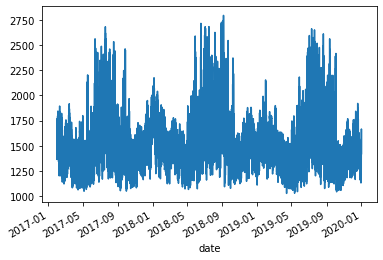

In [31]:
train['mw'].plot()

<AxesSubplot:xlabel='date'>

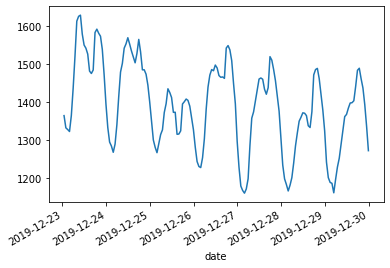

In [36]:
train.loc['2019-12-23':'2019-12-29', 'mw'].plot()


<AxesSubplot:xlabel='date'>

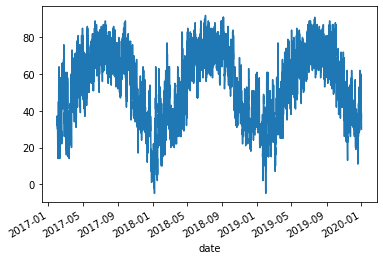

In [33]:
train['temp'].plot()

<AxesSubplot:xlabel='date'>

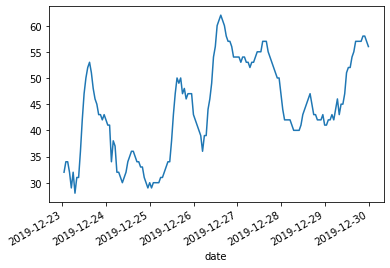

In [35]:
train.loc['2019-12-23':'2019-12-29', 'temp'].plot()

In [38]:
train['mw'].corr(train['temp'])

0.32287720097619604

In [42]:
train.plot.scatter(x = 'temp', y = 'mw')

<AxesSubplot:xlabel='temp', ylabel='mw'>